In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "climate.txt"
climatepd = pd.read_csv(csv_path, encoding="ISO-8859-1")
climatepd.head()

,StateCode,Division,YearMonth,PCP,TAVG,PDSI,PHDI,ZNDX,PMDI,CDD,...,SP01,SP02,SP03,SP06,SP09,SP12,SP24,TMIN,TMAX,Unnamed: 20
0,110,0,190001,1.74,34.11,-1.80,-1.80,-1.86,-1.80,5,...,-1.05,-.68,-.73,-1.2,-.96,-.94,-.65,23.94,44.26,NaN
1,110,0,190002,2.52,30.76,0.61,-1.01,1.83,-0.05,5,...,.91,-.18,-.14,-.76,-.75,-.87,-.39,19.36,42.15,NaN
2,110,0,190003,2.28,41.27,0.31,-1.14,-0.72,-0.50,13,...,-.42,.33,-.4,-.26,-.86,-1.08,-.44,29.53,53.01,NaN
3,110,0,190004,3.41,51.6,1.13,1.13,2.55,1.13,26,...,1.84,.92,1.18,.28,-.45,-.4,-.07,39.87,63.36,NaN
4,110,0,190005,2.45,61.74,-0.60,-0.60,-1.80,-0.60,102,...,-.96,.6,.24,.04,-.5,-.53,-.31,48.58,74.89,NaN


In [3]:
climatepd.columns

Index(['StateCode', 'Division', 'YearMonth', '    PCP', '   TAVG', '   PDSI',
       '   PHDI', '   ZNDX', '   PMDI', '    CDD', '    HDD', '   SP01',
       '   SP02', '   SP03', '   SP06', '   SP09', '   SP12', '   SP24',
       '   TMIN', '   TMAX', 'Unnamed: 20'],
      dtype='object')

In [4]:
climate_dropped = climatepd.drop(columns=['StateCode', 'Division', '   PDSI', '   PHDI', '   ZNDX', '   PMDI', '    CDD', '    HDD', '   SP01',
       '   SP02', '   SP03', '   SP06', '   SP09', '   SP12', '   SP24',
       '   TMIN', '   TMAX', 'Unnamed: 20' ])

In [5]:
climate_dropped.head()

,YearMonth,PCP,TAVG
0,190001,1.74,34.11
1,190002,2.52,30.76
2,190003,2.28,41.27
3,190004,3.41,51.6
4,190005,2.45,61.74


In [22]:
climate_dropped['year'] = climatepd.YearMonth.astype(str).str[:4]
climate_dropped['month'] = climatepd.YearMonth.astype(str).str[4:6]
climate_dropped.head()

,YearMonth,PCP,TAVG,year,month
0,190001,1.74,34.11,1900,01
1,190002,2.52,30.76,1900,02
2,190003,2.28,41.27,1900,03
3,190004,3.41,51.6,1900,04
4,190005,2.45,61.74,1900,05


In [27]:
climate_dropped['date']=(pd.to_datetime(climate_dropped['year'].astype(str)  + climate_dropped['month'], format='%Y%m'))
climate_dropped.head()

,YearMonth,PCP,TAVG,year,month,date
0,190001,1.74,34.11,1900,01,1900-01-01
1,190002,2.52,30.76,1900,02,1900-02-01
2,190003,2.28,41.27,1900,03,1900-03-01
3,190004,3.41,51.6,1900,04,1900-04-01
4,190005,2.45,61.74,1900,05,1900-05-01


In [30]:
climate_pd = climate_dropped.drop(columns=["YearMonth", 'year', 'month']).set_index('date')

In [31]:
climate_pd.head()

,PCP,TAVG
date,,
1900-01-01,1.74,34.11
1900-02-01,2.52,30.76
1900-03-01,2.28,41.27
1900-04-01,3.41,51.6
1900-05-01,2.45,61.74


In [43]:
climate_pd.dtypes

    PCP    object
   TAVG    object
dtype: object

In [56]:
climate_pd = climate_pd.rename(index=str, columns={'    PCP': "PCP", '   TAVG': 'TAVG'})
climate_pd.tail()

,PCP,TAVG
date,,
2019-09-01 00:00:00,-9.99,-99.9
2019-10-01 00:00:00,-9.99,-99.9
2019-11-01 00:00:00,-9.99,-99.9
2019-12-01 00:00:00,-9.99,-99.9
2020-01-01 00:00:00,,


In [64]:
climate_pd.drop(climate_pd.tail(12).index,inplace=True)
climate_pd.tail()

,PCP,TAVG
date,,
2018-09-01 00:00:00,3.57,67.55
2018-10-01 00:00:00,3.42,53.73
2018-11-01 00:00:00,2.71,40.06
2018-12-01 00:00:00,3.23,35.58
2019-01-01 00:00:00,2.49,32.67


In [74]:
climate_pd["PCP"] = pd.to_numeric(climate_pd['PCP'])
climate_pd["TAVG"] = pd.to_numeric(climate_pd['TAVG'])

In [75]:
climate_pd.to_csv('prec_temp_usa.csv')

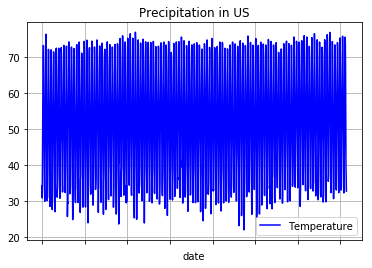

In [79]:
# climate_pd['PCP'].plot(x='date',color='b', label='Precipitation', grid=True)
climate_pd['TAVG'].plot(x='date',color='b', label='Temperature', grid=True)
plt.legend()
plt.xlabel('date')
plt.title('Precipitation in US')
plt.show()